In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [4]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde
26,Natal,2018-07-20,370.00,853,3
24,Fortaleza,2019-01-01,35.38,1005,4
46,Aracaju,2018-01-01,41.42,1522,2
94,Fortaleza,2019-01-01,150.49,1003,5
53,Recife,2019-01-01,37.05,983,6


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df["LojaID"] = df["LojaID"].astype("object")


In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [14]:
df["Receita"].max()

3544.0

In [15]:
df.nlargest(3, "Receita") 

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [17]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [18]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [19]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [20]:
df["Data"] = pd.to_datetime(df["Data"])

In [21]:
df["Ano_Venda"] = df["Data"].dt.year

In [22]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
2,Natal,2019-03-11,308.00,852,3,924.00,2019
75,Recife,2019-01-01,170.29,981,8,1362.32,2019
174,Salvador,2019-01-02,35.30,1037,1,35.30,2019
162,Salvador,2019-01-02,23.08,1036,2,46.16,2019
145,Salvador,2019-01-02,84.62,1034,2,169.24,2019


In [23]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [24]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [25]:
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [26]:
df["semestre_venda"] = df["Data"].dt.quarter

In [27]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [28]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [29]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2019,3,2,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1


In [30]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

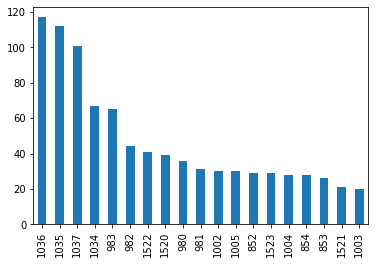

In [31]:
df["LojaID"].value_counts().plot.bar()

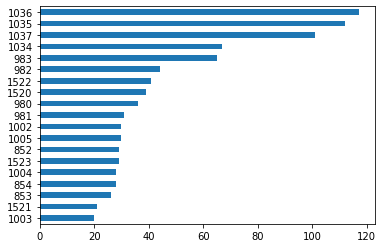

In [32]:
df["LojaID"].value_counts(ascending=True).plot.barh()

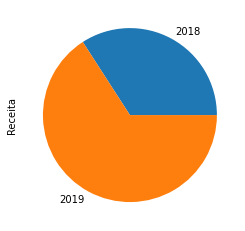

In [33]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [34]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

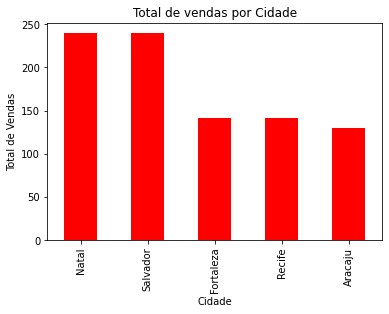

In [35]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [36]:
plt.style.use("ggplot")

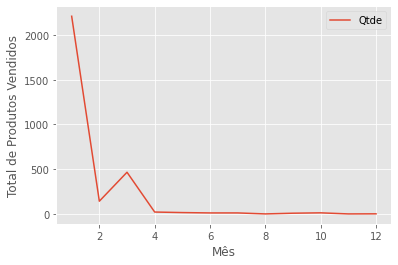

In [37]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()

In [38]:
df.groupby(df["mes_venda"])["Qtde"].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [39]:
df_2019 =df[df["Ano_Venda"] == 2019]

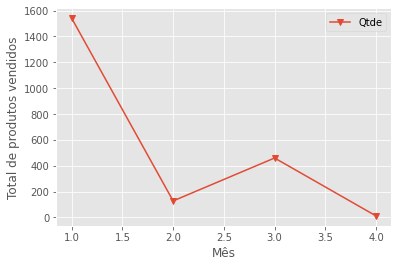

In [40]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

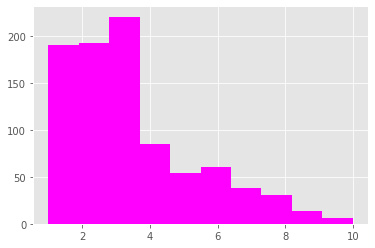

In [41]:
plt.hist(df["Qtde"], color="magenta");

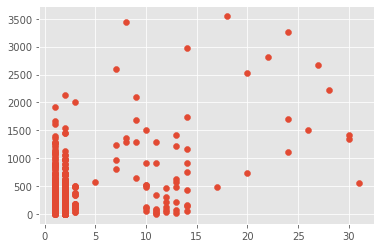

In [42]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

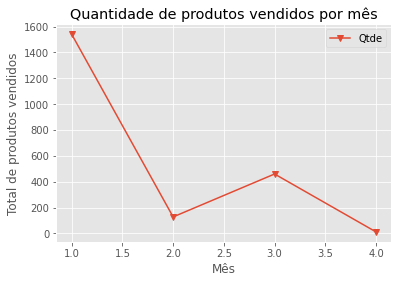

In [43]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("Grafico QTDExMES.png")